In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

In [315]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Generate sample data for linear regression model
n_samples = 100
X_raw = np.random.rand(n_samples, 1)  # Random feature data (100 samples, 1 feature)
y_raw = 3 * X_raw + 5 + np.random.randn(n_samples, 1) * 0.5  # Linear relation with some noise

In [316]:
# Visualize the data
def plot_graph(w, b):
    plt.scatter(X_raw, y_raw, color='blue', label='Data points')
    plt.plot(X_raw, 3*X_raw + 5, color='red', label='True Line: y = 3x + 5')
    plt.plot(X_raw, w*X_raw + b, color='yellow', label='Predicted Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

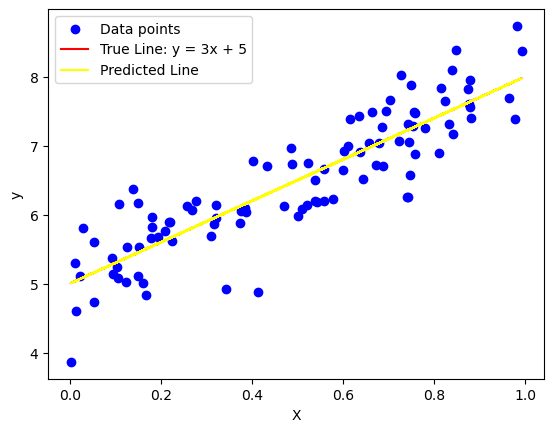

In [317]:
plot_graph(3, 5)

In [318]:
# Data
X = torch.tensor(X_raw, dtype = torch.float32)
y = torch.tensor(y_raw, dtype = torch.float32)

X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

## Train using Gradient Descent (Custom)

In [319]:
# Parameters
w = torch.randn((1,1), dtype = torch.float32, requires_grad = True)
b = torch.randn((1,1), dtype = torch.float32, requires_grad = True)

# Train using gradient descent
for i in range(1500):
    # fwd pass
    y_pred = X @ w + b

    # loss
    loss = (y_pred - y)**2
    loss = loss.mean()

    # bwd pass
    w.grad = None
    b.grad = None
    loss.backward()
    
    # optimizer step
    with torch.no_grad():
        w.data -= 0.01 * w.grad
        b.data -= 0.01 * b.grad

    if (i + 1) % 100 == 0:
        print(f'loss at iteration {i + 1} = {loss.item()}')

loss at iteration 100 = 0.4564214050769806
loss at iteration 200 = 0.20826730132102966
loss at iteration 300 = 0.20663519203662872
loss at iteration 400 = 0.20653869211673737
loss at iteration 500 = 0.2064712941646576
loss at iteration 600 = 0.2064191699028015
loss at iteration 700 = 0.20637884736061096
loss at iteration 800 = 0.20634767413139343
loss at iteration 900 = 0.20632357895374298
loss at iteration 1000 = 0.20630493760108948
loss at iteration 1100 = 0.20629054307937622
loss at iteration 1200 = 0.20627935230731964
loss at iteration 1300 = 0.2062707543373108
loss at iteration 1400 = 0.20626409351825714
loss at iteration 1500 = 0.2062588930130005


In [320]:
w, b

(tensor([[3.0005]], requires_grad=True),
 tensor([[4.9960]], requires_grad=True))

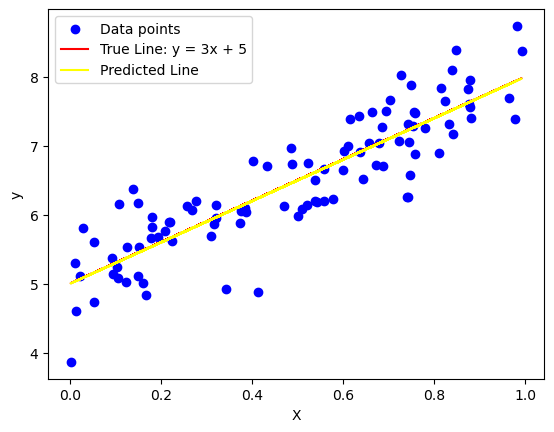

In [321]:
plot_graph(w.item(), b.item())

## Use torch nn module

In [403]:
class model(nn.Module):
    def __init__(self, in_feats, out_feats):
        super().__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        
        # weights
        self.weight = self.linear.weight
        self.bias = self.linear.bias
        return

    def forward(self, x):
        x = self.linear(x)
        return x

In [323]:
lg = model(1, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(lg.parameters(), lr = 0.01)

for i in range(1000):
    # set to train mode
    lg.train()
    
    # fwd pass
    y_pred = lg(X)

    # loss
    loss = criterion(y_pred, y)

    # bwd pass
    optimizer.zero_grad()
    loss.backward()

    # step
    optimizer.step()

    if (i + 1) % 100 == 0:
        print(f'loss at iteration {i + 1} = {loss}')

loss at iteration 100 = 0.4938787519931793
loss at iteration 200 = 0.22363609075546265
loss at iteration 300 = 0.21843671798706055
loss at iteration 400 = 0.21566447615623474
loss at iteration 500 = 0.2135283350944519
loss at iteration 600 = 0.21187639236450195
loss at iteration 700 = 0.21059899032115936
loss at iteration 800 = 0.20961111783981323
loss at iteration 900 = 0.2088472545146942
loss at iteration 1000 = 0.20825651288032532


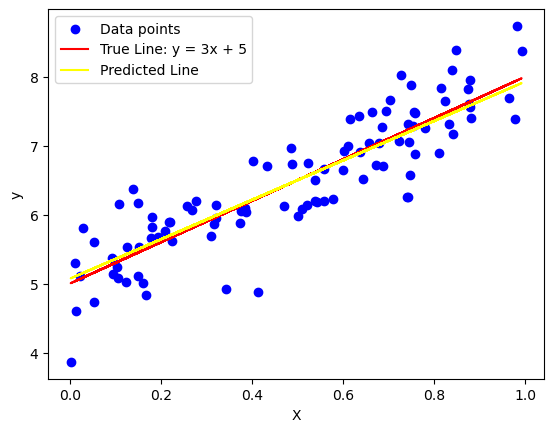

In [324]:
w, b = lg.weight.item(), lg.bias.item()
plot_graph(w, b)

## OLS

In [325]:
X = torch.hstack((X, torch.ones(X.shape[0], 1)))
X.shape

torch.Size([100, 2])

In [326]:
theta_cap = (torch.inverse(X.T @ X) @ X.T) @ y

In [327]:
w, b = theta_cap
w, b

(tensor([3.0152]), tensor([4.9884]))

In [328]:
y_pred = X @ theta_cap
    
# loss
loss = (y_pred - y)**2
loss = loss.mean()

print(f'loss={loss}')

loss=0.20624133944511414


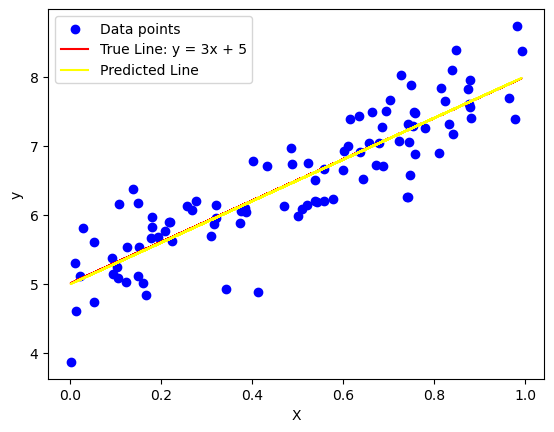

In [329]:
plot_graph(w.item(), b.item())

## Regularisation

In [426]:
# Generate linear data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3*X + 5 + np.random.normal(0, 2, size=(X.shape[0], 1))

# Add outliers
num_outliers = 20
outlier_X = np.random.uniform(1, 2, size = (num_outliers, 1))  # Random X in the range [2, 8]
outlier_y = np.random.uniform(50, 100, size = (num_outliers,1))  # Outliers with high y values
X = np.vstack([X, outlier_X])
y = np.vstack([y, outlier_y])

# Shuffle the data
shuffled_indices = np.random.permutation(len(X))
X_outlier_raw = X[shuffled_indices]
y_outlier_raw = y[shuffled_indices]

In [427]:
def plot_graph_outliers(w, b):
    # Plot the data
    plt.scatter(X_outlier_raw, y_outlier_raw, label='Data with Outliers')
    plt.plot(X_outlier_raw, 3*X_outlier_raw + 5, color='red', label='True Line: y = 3x + 5')
    plt.plot(X_outlier_raw, w*X_outlier_raw + b, color='yellow', label='Predicted Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Synthetic Data with Outliers')
    plt.legend()
    plt.show()

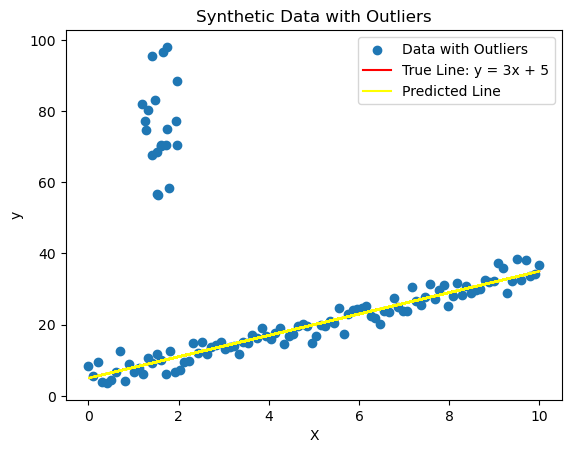

In [428]:
plot_graph_outliers(3, 5)

In [429]:
X = torch.tensor(X_outlier_raw, dtype = torch.float32)
y = torch.tensor(y_outlier_raw, dtype = torch.float32)

X.shape, y.shape

(torch.Size([120, 1]), torch.Size([120, 1]))

loss at iteration 100 = 648.1561889648438
loss at iteration 200 = 642.483642578125
loss at iteration 300 = 642.2670288085938
loss at iteration 400 = 642.2586669921875
loss at iteration 500 = 642.258544921875
loss at iteration 600 = 642.258544921875
loss at iteration 700 = 642.258544921875
loss at iteration 800 = 642.258544921875
loss at iteration 900 = 642.258544921875
loss at iteration 1000 = 642.258544921875


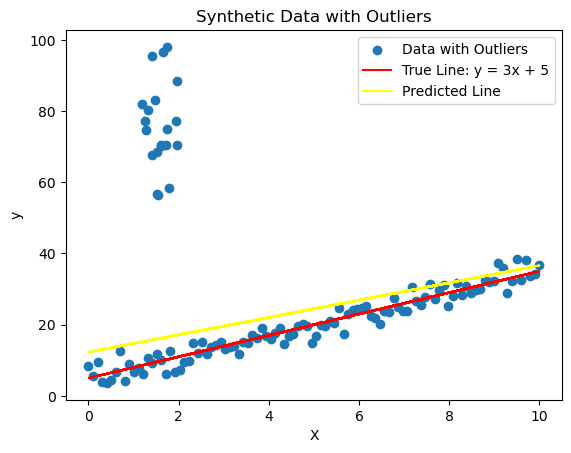

In [437]:
lg = model(1, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(lg.parameters(), lr = 0.02, weight_decay = 1)

for i in range(1000):
    # set to train mode
    lg.train()
    
    # fwd pass
    y_pred = lg(X)

    # loss
    loss = criterion(y_pred, y)

    # bwd pass
    optimizer.zero_grad()
    loss.backward()

    # step
    optimizer.step()

    if (i + 1) % 100 == 0:
        print(f'loss at iteration {i + 1} = {loss}')


w, b = lg.weight.item(), lg.bias.item()
plot_graph_outliers(w, b)

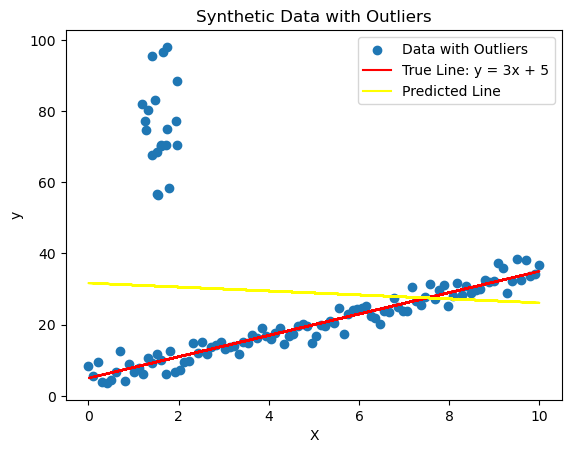

In [438]:
X_ = torch.hstack((X, torch.ones(X.shape[0], 1)))
theta_cap = (torch.inverse(X_.T @ X_) @ X_.T) @ y
w, b = theta_cap

plot_graph_outliers(w.item(), b.item())

Epoch [100/1000], Loss: 12.9582
Epoch [200/1000], Loss: 12.7604
Epoch [300/1000], Loss: 12.6682
Epoch [400/1000], Loss: 12.5864
Epoch [500/1000], Loss: 12.5147
Epoch [600/1000], Loss: 12.4517
Epoch [700/1000], Loss: 12.3967
Epoch [800/1000], Loss: 12.3487
Epoch [900/1000], Loss: 12.3068
Epoch [1000/1000], Loss: 12.2700
Learned weight: 3.220369338989258
Learned bias: 3.6207022666931152


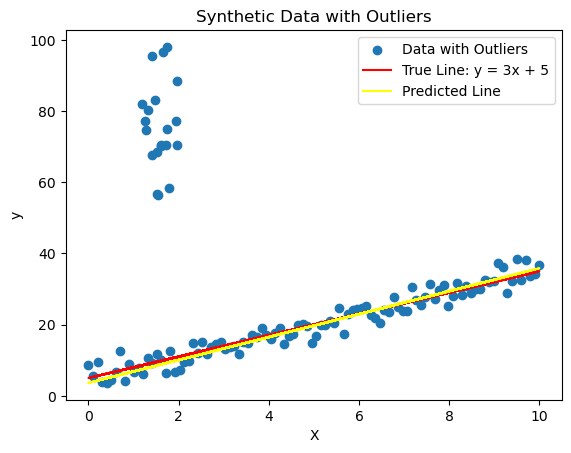

In [439]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleLinearModel(nn.Module):
    def __init__(self):
        super(SimpleLinearModel, self).__init__()
        # Define a linear layer
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        # Apply the linear transformation
        return self.linear(x)

# Instantiate the model
model_ = SimpleLinearModel()

# Define loss and optimizer
criterion = nn.HuberLoss()  # Mean Squared Error loss
optimizer = optim.SGD(model_.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    model_.train()

    # Forward pass
    y_pred = model_(X)
    
    # Compute loss
    loss = criterion(y_pred, y)
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

# Output learned parameters
print(f'Learned weight: {model_.linear.weight.item()}')
print(f'Learned bias: {model_.linear.bias.item()}')

plot_graph_outliers(model_.linear.weight.item(), model_.linear.bias.item())